In [337]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# Data transformation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

# Features Selection
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.linear_model import Lasso
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
from sklearn.metrics import confusion_matrix


from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [9]:
BANK_DATA = pd.read_csv('Data/bank-additional-full.csv',sep = ';')
BANK_DATA.shape

(41188, 21)

In [10]:
df = BANK_DATA.copy()
df.shape

(41188, 21)

In [262]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# DATA PREPARATION

In [12]:
col_cat = list(df.select_dtypes(include=['object']).columns)
print(len(col_cat))
print(col_cat)

11
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [13]:
for itr in col_cat:
    print(itr,': ', df[itr].nunique() )

job :  12
marital :  4
education :  8
default :  3
housing :  3
loan :  3
contact :  2
month :  10
day_of_week :  5
poutcome :  3
y :  2


In [14]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]  

In [15]:
X.shape, y.shape

((41188, 20), (41188,))

### Encoding

In [263]:
col_cat_X = list(X.select_dtypes(include=['object']).columns)
len(col_cat_X)

10

In [264]:
oe = OrdinalEncoder()
oe.fit(X[col_cat_X])
X_cat_enc = oe.transform(X[col_cat_X])

In [265]:
X_cat_enc

array([[3., 1., 0., ..., 6., 1., 1.],
       [7., 1., 3., ..., 6., 1., 1.],
       [7., 1., 3., ..., 6., 1., 1.],
       ...,
       [5., 1., 6., ..., 7., 0., 1.],
       [9., 1., 5., ..., 7., 0., 1.],
       [5., 1., 5., ..., 7., 0., 0.]])

In [266]:
X_cat_enc = pd.DataFrame(X_cat_enc)
X_cat_enc.columns = col_cat_X
X_cat_enc

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0
1,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,1.0
2,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0
4,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
41183,5.0,1.0,5.0,0.0,2.0,0.0,0.0,7.0,0.0,1.0
41184,1.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0
41185,5.0,1.0,6.0,0.0,2.0,0.0,0.0,7.0,0.0,1.0
41186,9.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0


### Scaling

In [267]:
col_num_X = list(df.select_dtypes(include=['number']))
len(col_num_X)

10

In [268]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_num_enc = scaler.fit_transform(X[col_num_X])

In [269]:
X_num_enc

array([[0.48148148, 0.05307035, 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.49382716, 0.03029687, 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.24691358, 0.04595364, 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       ...,
       [0.48148148, 0.03843026, 0.01818182, ..., 0.        , 0.08932215,
        0.        ],
       [0.33333333, 0.08987393, 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.7037037 , 0.04859699, 0.03636364, ..., 0.        , 0.08932215,
        0.        ]])

In [270]:
X_num_enc = pd.DataFrame(X_num_enc)
X_num_enc.columns = col_num_X
X_num_enc

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.481481,0.053070,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
1,0.493827,0.030297,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
2,0.246914,0.045954,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
3,0.283951,0.030704,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
4,0.481481,0.062424,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.067914,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41184,0.358025,0.077877,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41185,0.481481,0.038430,0.018182,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41186,0.333333,0.089874,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000


### Merge both dataframes

In [410]:
X_enc = pd.concat([X_cat_enc, X_num_enc], axis=1)
X_enc.shape

(41188, 20)

In [314]:
X_enc

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0,0.481481,0.053070,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
1,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,1.0,0.493827,0.030297,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
2,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,1.0,0.246914,0.045954,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0,0.283951,0.030704,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
4,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,1.0,0.481481,0.062424,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5.0,1.0,5.0,0.0,2.0,0.0,0.0,7.0,0.0,1.0,0.691358,0.067914,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41184,1.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0,0.358025,0.077877,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41185,5.0,1.0,6.0,0.0,2.0,0.0,0.0,7.0,0.0,1.0,0.481481,0.038430,0.018182,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41186,9.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0,0.333333,0.089874,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000


In [273]:
le = LabelEncoder()
le.fit(y)
y_enc = le.transform(y)
y_enc = pd.Series(y_enc)

* Label Encoder making
    * no = 0
    * yes = 1

In [274]:
y_enc

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Length: 41188, dtype: int64

# FEATURE SELECTION

## P-Value Test

In [411]:
ind_feat = X_enc
dep_feat = y_enc

In [412]:
ind_feat.drop(['nr.employed','euribor3m'], axis=1, inplace=True)
ind_feat.shape

(41188, 18)

In [413]:
ind_feat = sm.add_constant(ind_feat) 
model = sm.OLS(dep_feat, ind_feat).fit()

p_values = model.pvalues

alpha = 0.05

significant_features = ind_feat.columns[p_values <= alpha]

print("Significant Features:", significant_features)

Significant Features: Index(['const', 'marital', 'education', 'default', 'contact', 'month',
       'day_of_week', 'poutcome', 'age', 'duration', 'campaign', 'pdays',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')


In [414]:
len(significant_features)

15

In [421]:
significant_features

Index(['const', 'marital', 'education', 'default', 'contact', 'month',
       'day_of_week', 'poutcome', 'age', 'duration', 'campaign', 'pdays',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')

In [417]:
significant_features.drop('const')
X_imp = X_enc[significant_features[significant_features!='const']]
X_imp.shape

(41188, 14)

## LASSO

In [137]:
lasso = Lasso()
lasso.fit(X_enc,y_enc)

feature_coefficients = lasso.coef_

feature_coef = pd.Series(lasso.coef_, index=X_enc.columns)

selected_features_lasso = feature_coef_pairs[feature_coef_pairs != 0]
selected_features_lasso

job            0.000479
education      0.003927
month         -0.005080
day_of_week    0.000139
poutcome       0.041033
pdays         -0.083116
euribor3m     -0.032687
nr.employed   -0.225521
dtype: float64

In [158]:
selected_features_lasso = abs(selected_features_lasso)
selected_features_lasso

nr.employed    0.225521
pdays          0.083116
poutcome       0.041033
euribor3m      0.032687
month          0.005080
education      0.003927
job            0.000479
day_of_week    0.000139
dtype: float64

<BarContainer object of 8 artists>

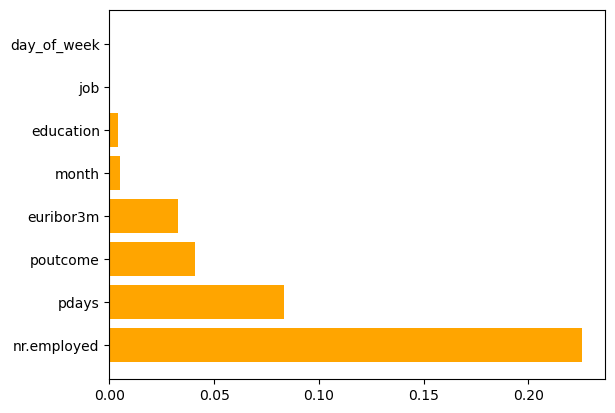

In [422]:
selected_features_lasso.sort_values(inplace=True, ascending=False)
plt.barh(selected_features_lasso.index, np.abs(selected_features_lasso.values), color='orange')

## Feature Importance

In [425]:
FI_model = ExtraTreesClassifier()
FI_model.fit(X_imp,y_enc)

ExtraTreesClassifier()

In [426]:
print(FI_model.feature_importances_)

[0.03411345 0.06594584 0.00938126 0.01393846 0.02373661 0.06597304
 0.03915414 0.13797026 0.34231669 0.07418421 0.06556436 0.05982893
 0.03097698 0.03691578]


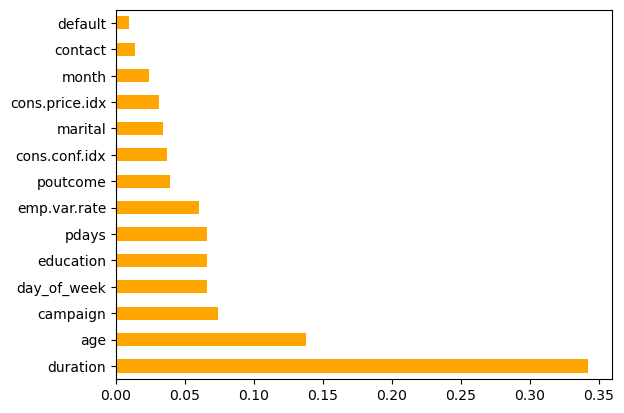

In [432]:
feature_importances = pd.Series(FI_model.feature_importances_, index=X_imp.columns)
feature_importances.sort_values(ascending=False).plot(kind='barh', color='orange')
feature_importances.sort_values(ascending=False, inplace=True)
plt.show()

# Saving Dataframe with Selected Features

In [440]:
Final_DF = pd.concat([X_imp,y_enc],axis=1)
Final_DF = Final_DF.rename(columns={0: 'y'})
Final_DF.shape

(41188, 15)

In [441]:
Final_DF

,marital,education,default,contact,month,day_of_week,poutcome,age,duration,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,1.0,0.0,0.0,1.0,6.0,1.0,1.0,0.481481,0.053070,0.000000,1.0,0.937500,0.698753,0.60251,0
1,1.0,3.0,1.0,1.0,6.0,1.0,1.0,0.493827,0.030297,0.000000,1.0,0.937500,0.698753,0.60251,0
2,1.0,3.0,0.0,1.0,6.0,1.0,1.0,0.246914,0.045954,0.000000,1.0,0.937500,0.698753,0.60251,0
3,1.0,1.0,0.0,1.0,6.0,1.0,1.0,0.283951,0.030704,0.000000,1.0,0.937500,0.698753,0.60251,0
4,1.0,3.0,0.0,1.0,6.0,1.0,1.0,0.481481,0.062424,0.000000,1.0,0.937500,0.698753,0.60251,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1.0,5.0,0.0,0.0,7.0,0.0,1.0,0.691358,0.067914,0.000000,1.0,0.479167,1.000000,0.00000,1
41184,1.0,5.0,0.0,0.0,7.0,0.0,1.0,0.358025,0.077877,0.000000,1.0,0.479167,1.000000,0.00000,0
41185,1.0,6.0,0.0,0.0,7.0,0.0,1.0,0.481481,0.038430,0.018182,1.0,0.479167,1.000000,0.00000,0
41186,1.0,5.0,0.0,0.0,7.0,0.0,1.0,0.333333,0.089874,0.000000,1.0,0.479167,1.000000,0.00000,1


In [442]:
Final_DF.to_csv('Data/Final_Data.csv', index=False)